# Bootstrap Regression Experiments

### Run bootstrap experiments for linear regression with simulated heteroskedastic, heavy-tailed data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.simulate import generate_linear_data, save_df, plot_data
from src.bootstrap_methods import (
    fit_ols,
    bootstrap_parametric_normal,
    bootstrap_pairs,
    bootstrap_residuals,
    bootstrap_wild,
    bootstrap_summary,
)
from src.evaluate import (
    plot_bootstrap_lines,
    plot_coef_histogram,
    compute_bias_var,
)

%matplotlib inline

## Experiment Setup

In [2]:
random_seed = 2025
n_boot = 10000   # lower for quicker runtime

# Simulate messy data (heteroskedastic + heavy-tailed)
df, true_params = generate_linear_data(
    seed=random_seed,
    heteroskedastic=True,
    hetero_strength=5.0,
    heavy_tails=True,
)
save_df(df, "data/simulated.csv")

X = df["x"].values
y = df["y"].values

# Quick visualization of the simulated data
fig = plot_data(df, true_params)

In [3]:
# Baseline OLS fit

ols_fit = fit_ols(X, y)
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     69.67
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           4.42e-09
Time:                        11:39:06   Log-Likelihood:                -66.641
No. Observations:                  30   AIC:                             137.3
Df Residuals:                      28   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4788      0.423      5.856      0.0

# 1. Parametric Normal Bootstrap

Parametric bootstrap summary:
            mean       std      2.5%     97.5%
const  2.472029  0.422329  1.638335  3.300431
x1     3.053409  0.366377  2.345254  3.775033


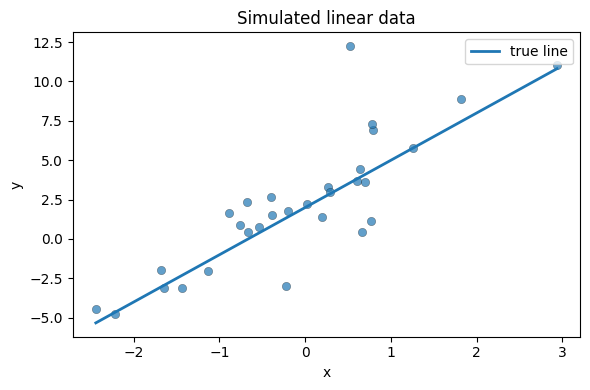

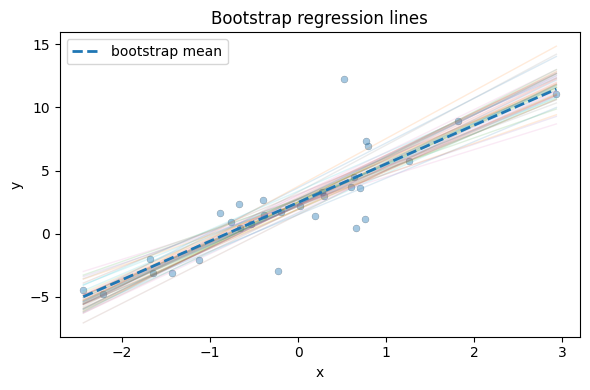

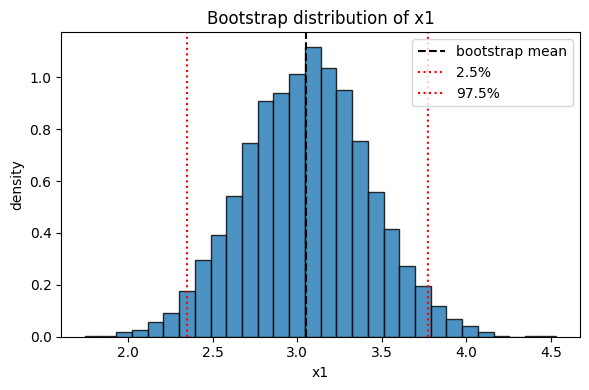

Parametric bootstrap bias/variance:
        true    mean    bias     var     std  ci_width
const   2.0  2.4720  0.4720  0.1784  0.4223    1.6621
x1      3.0  3.0534  0.0534  0.1342  0.3664    1.4298


In [4]:
boot_param = bootstrap_parametric_normal(X, y, n_boot=n_boot, seed=1)
boot_param = boot_param.rename(columns={0: "x1"})  # nicer column names

print("Parametric bootstrap summary:\n", bootstrap_summary(boot_param))

graph = plot_bootstrap_lines(X, y, boot_param, n_lines=50)
hist = plot_coef_histogram(boot_param, coef="x1", alpha=0.05, ols_res=ols_fit)
plt.show()

print("Parametric bootstrap bias/variance:\n",
      compute_bias_var(boot_param, {
          "const": true_params["beta0"],
          "x1": true_params["beta1"],
      }).round(4))


## 2. Pairs Bootstrap

Pairs bootstrap summary:
            mean       std      2.5%     97.5%
const  2.473969  0.434858  1.657180  3.375234
x1     3.052299  0.254298  2.548211  3.590607


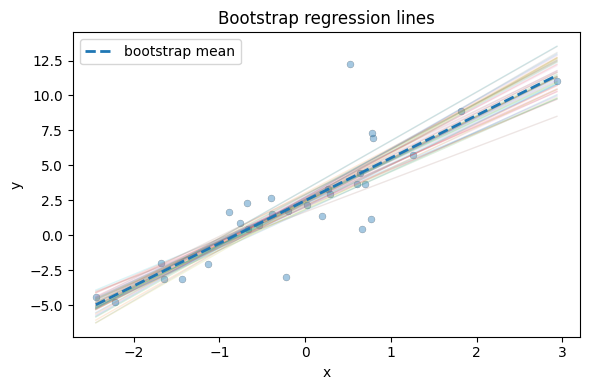

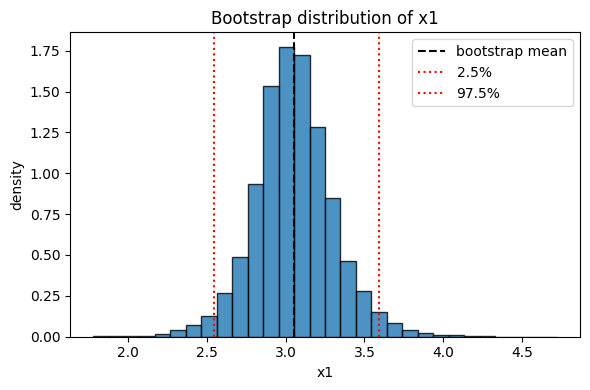

Pairs bootstrap bias/variance:
        true    mean    bias     var     std  ci_width
const   2.0  2.4740  0.4740  0.1891  0.4349    1.7181
x1      3.0  3.0523  0.0523  0.0647  0.2543    1.0424


In [5]:
boot_pairs = bootstrap_pairs(X, y, n_boot=n_boot, seed=1)
boot_pairs = boot_pairs.rename(columns={0: "x1"})

print("Pairs bootstrap summary:\n", bootstrap_summary(boot_pairs))

plot_bootstrap_lines(X, y, boot_pairs, n_lines=50)
plot_coef_histogram(boot_pairs, coef="x1", alpha=0.05, ols_res=ols_fit)
plt.show()

print("Pairs bootstrap bias/variance:\n",
      compute_bias_var(boot_pairs, {
          "const": true_params["beta0"],
          "x1": true_params["beta1"],
      }).round(4))

## Notes/Insights

### - Both bootstraps recover the slope (x1) very well: almost no bias (~+0.05).
### - Intercept (const) is less precise, with upward bias (~+0.47).
### - Parametric bootstrap assumes normal residuals, so it yields slightly narrower CIs.
### - In heavy-tailed data, pairs bootstrap is more robust.

## 3. Residual Bootstrap

Residual bootstrap summary:
            mean       std      2.5%     97.5%
const  2.474198  0.407594  1.706561  3.304231
x1     3.051102  0.350615  2.345715  3.756240


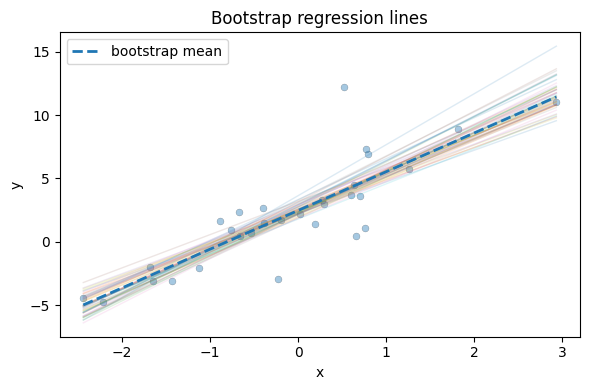

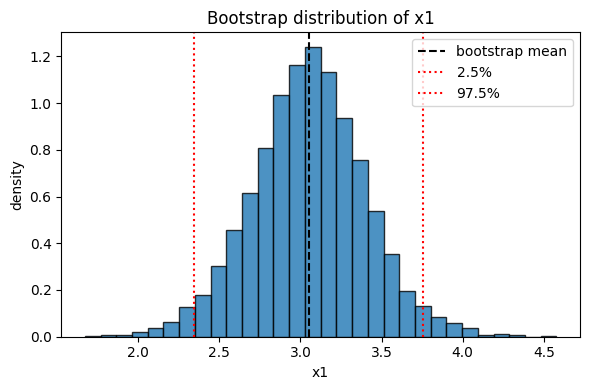

Residual bootstrap bias/variance:
        true    mean    bias     var     std  ci_width
const   2.0  2.4742  0.4742  0.1661  0.4076    1.5977
x1      3.0  3.0511  0.0511  0.1229  0.3506    1.4105


In [6]:
boot_resid = bootstrap_residuals(X, y, n_boot=n_boot, seed=1)
boot_resid = boot_resid.rename(columns={0: "x1"})

print("Residual bootstrap summary:\n", bootstrap_summary(boot_resid))

plot_bootstrap_lines(X, y, boot_resid, n_lines=50)
plot_coef_histogram(boot_resid, coef="x1", alpha=0.05, ols_res=ols_fit)
plt.show()

print("Residual bootstrap bias/variance:\n",
      compute_bias_var(boot_resid, {
          "const": true_params["beta0"],
          "x1": true_params["beta1"],
      }).round(4))

## 4. Wild Bootstrap

Wild bootstrap summary:
            mean       std      2.5%     97.5%
const  2.478834  0.423375  1.679600  3.289244
x1     3.048997  0.213868  2.635639  3.460461


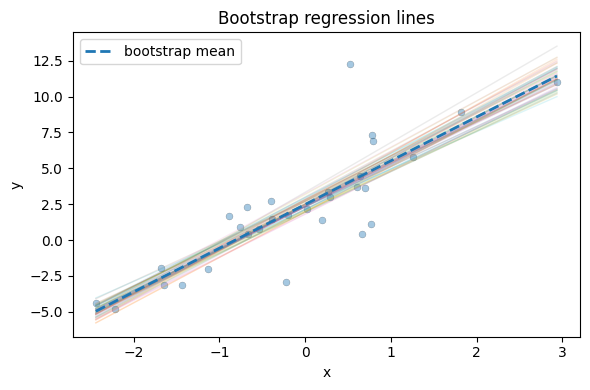

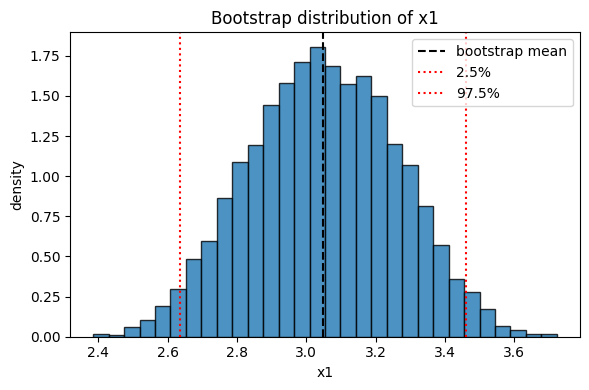

Wild bootstrap bias/variance:
        true    mean    bias     var     std  ci_width
const   2.0  2.4788  0.4788  0.1792  0.4234    1.6096
x1      3.0  3.0490  0.0490  0.0457  0.2139    0.8248


In [7]:
boot_wild = bootstrap_wild(X, y, n_boot=n_boot, seed=1, wild="rademacher")
boot_wild = boot_wild.rename(columns={0: "x1"})

print("Wild bootstrap summary:\n", bootstrap_summary(boot_wild))

plot_bootstrap_lines(X, y, boot_wild, n_lines=50)
plot_coef_histogram(boot_wild, coef="x1", alpha=0.05, ols_res=ols_fit)
plt.show()

print("Wild bootstrap bias/variance:\n",
      compute_bias_var(boot_wild, {
          "const": true_params["beta0"],
          "x1": true_params["beta1"],
      }).round(4))

### summary

- Both bootstraps recover the slope (x1) very well: almost no bias (~+0.05).
- Intercept (const) shows noticeable upward bias (~+0.47) and larger uncertainty.
- Wild bootstrap gives tighter confidence intervals for the slope (CI width ~0.82 vs. ~1.41), reflecting lower variance.
- Residual bootstrap produces slightly wider intervals, but results are still consistent with the true parameters.